# <font color=blue> *Implementazione dell'algoritmo K-NEAREST NEIGHBORS* </font>

In [1]:
from sklearn import datasets
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [2]:
data= datasets.load_iris()

In [3]:
x=data["data"]
y=data["target"]

In [4]:
rnd= default_rng(seed=12)
permutation= rnd.permutation(len(y))

In [5]:
x= x[permutation]
y= y[permutation]

In [6]:
n= int(len(y)*0.8)

In [7]:
train_x= x[:n]
train_y= y[:n]
test_x= x[n:]
test_y= y[n:]

In [8]:
class K_Nearest_Neighbors:
    
    def __init__(self,k):
        self.k=k
    
    def fit(self,train_x,train_y):
        self.train_x=train_x
        self.train_y=train_y
        model = {'train_x':train_x, 'train_y':train_y, 'k':k}
        return model
    
    def predict_single(self,test_x):
        train_x= self.train_x
        train_y= self.train_y
        k= self.k
    
        distances=np.zeros(shape=(len(train_y,)))
    
        for i in range(len(train_x)):
            d= np.sqrt(np.sum((train_x[i]-test_x)**2))
            distances[i]=d
        
        sorting = np.argsort(distances)
        k_neighbors = sorting[:k]
        neighbors_label = train_y[k_neighbors]
                      
        pred_new=np.argmax(np.bincount(neighbors_label))
        return pred_new

    def predicts(self, test_x):
        preds= []
        for i in range(test_x.shape[0]):
            preds.append(self.predict_single(test_x[i]))
        return np.array(preds)

In [9]:
def accuracy(test_y, y_preds):
    return np.sum(test_y==y_preds)/len(test_y)

In [10]:
accuracies= []
accuracies_tr = []
k_list = range(1,30)

for k in k_list:
    knn= K_Nearest_Neighbors(k)
    model= knn.fit(train_x,train_y)
    preds= knn.predicts(test_x)
    acc= accuracy(test_y, preds)
    accuracies.append(acc)
    y_preds_tr = knn.predicts(train_x)
    acc_tr = accuracy(train_y,y_preds_tr)
    accuracies_tr.append(acc_tr)

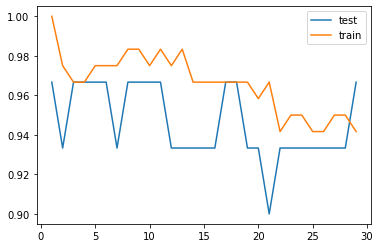

In [11]:
plt.figure()
plt.plot(k_list, accuracies,label='test')
plt.plot(k_list, accuracies_tr,label='train')
plt.legend()
plt.show()